# Decoding Method for Language Generation

Rahul Raj (rr4185)
Pulkit Khandelwal (pk2660)

## Background

---



**Intro:**

We have learnt about neural networks during our Intro to ML coursework. We have also seen specialized neural networks for specific tasks such as convolutional neural nets for images. 

**Transformers:**

Similarly, transformers are a powerful form of neural net that specialize in solving the problem of transduction or transformation of input sequences into output sequences in deep learning applications. They have a variety of applications ranging from translating text, generating poems, stories and even write/debug code. 

The encoder is responsible for taking in an input sequence and encoding it into a representation that is suitable for the task at hand and the decoder is responsible for generating an output sequence based on the encoded input representation. 

Transformer models have become widely popular in NLP tasks due to their ability to effectively capture long-range dependencies in the input and output sequences, as well as their parallelizability, which allows them to scale to large datasets and be trained efficiently on high-performance hardware.

 **‘Curious case of Natural Text Degeneration’ Paper:**

The paper we would be referring to is going to explore a brand new decoding strategy that can be applied to the decoder part of the transformer for any language model to attain better results at generating coherent and diverse text as compared to other commonly used strategies.

**Decoding Strategies:**

In our current paper we’ll be talking about a new decoding strategy called nucleus sampling.discusses the challenges of using decoding methods such as beam search to generate text from a language model, and proposes Nucleus Sampling as a solution. 

**What’s new?**

The proposed Nucleus Sampling technique can be used for generating text from a language model that aims to improve the quality and coherence of the generated text compared to other decoding strategies. 

One of the challenges in generating text from a language model is that the use of likelihood as a training objective can lead to high quality models for a range of language understanding tasks, but maximization-based decoding methods such as beam search can produce text that is bland, incoherent, or repetitive. 

To address this issue, the authors of the paper propose a method for truncating the unreliable tail of the probability distribution and sampling from the dynamic nucleus of tokens that contain the majority of the probability mass. This approach avoids text degeneration by focusing on the most reliable words in the probability distribution rather than the entire set of words. 

An important point is that Nucleus Sampling can be applied to any language model, not just the GPT-2 model mentioned in the provided text.

**Evaluation Metrics:**

To evaluate the effectiveness of Nucleus Sampling, the authors compare it to other decoding methods such as beam search and pure sampling using human evaluations and various metrics such as likelihood, diversity, and repetition. They find that Nucleus Sampling generates text that is of higher quality and more diverse compared to other decoding methods, and that it is currently the best available decoding strategy for generating long-form text that is both high-quality and diverse.

**Challenges & Limitations:**

One of the main limitations is that it relies on the quality of the underlying language model, which can affect the quality of the generated text. 
Also, as stated in the paper, Nucleus sampling is not always perfectly accurate and sometimes leads to incoherent text generation, however, when evaluated using the metrics given in the paper against other decoding techniques, it does perform a lot better.

Adapted from [\[1\]](#scrollTo=oIZM2e1Swt9Q) and [\[2\]](#scrollTo=oIZM2e1Swt9Q)


## Working with the existing code


The following changes were made to the original notebook code:

- Removed the older Tensorflow version being installed and used the latest one.
- Created the set_css() function for output formatting.
- Refractored the original code for running over multiple input strings in loops.
- Added multiple sample input strings to demostrate the claim.

Source of code -

https://github.com/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb

What the code does?

The code uses a pretrained GPT2 model in tensorflow. It installs the transformers library which contains the pretrained GPT2 model. 
Then we apply different decoding techniques to the prompts given as input to the model to validate the claim.

1) We create a list of 4 prompts

2) Pass prompt to each of the decoding technique, i.e, beam search, pure sampling, and nucleus sampling.

3) Store the results in a dictionary

4) Then output the results in validation bloack and compare.

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

[\[Above Code from 3\]](#scrollTo=oIZM2e1Swt9Q)


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q tensorflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Input prompts for the decoding techniques.

In [ ]:
prompts = ['An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008', 
           'A futuristic city should have lots of skyscrapers.',
           'a group of space travelers who are stranded on a deserted planet',
           'I moved to united states for higher studies']

prompt_input_ids = {}
for prompt in prompts:
  prompt_input_ids[prompt] = tokenizer.encode(prompt, return_tensors='tf')

[\[First prompt is from [1]\]](#scrollTo=oIZM2e1Swt9Q)

Dictionary to store decoding outputs.

In [ ]:
from collections import defaultdict
text_generations = defaultdict(dict)

Now we'll start applying Beam Search, pure sampling and Nucleus sampling strategies on the prompts list and store the result in text_generations dictionary.

### **Beam Search**

In [ ]:
# activate beam search and early_stopping
for prompt in prompt_input_ids:

  beam_output = model.generate(
      prompt_input_ids[prompt],  
      max_length=150, 
      num_beams=3, 
      early_stopping=True
  )
  text_generations[prompt]['Beam Search'] = tokenizer.decode(beam_output[0], skip_special_tokens=True)

### **Pure Sampling**

In [ ]:
for prompt in prompt_input_ids:
  tf.random.set_seed(0)

  # activate sampling
  sampling_output = model.generate(
      prompt_input_ids[prompt], 
      do_sample=True, 
      max_length=100,
      top_k=0
  )
  text_generations[prompt]['Pure Sampling'] = tokenizer.decode(sampling_output[0], skip_special_tokens=True)

### **Top-p (nucleus) sampling**

In [ ]:
for prompt in prompt_input_ids:

  tf.random.set_seed(0)

  # activate top-p sampling
  nucleus_output = model.generate(
      prompt_input_ids[prompt], 
      do_sample=True, 
      max_length=100, 
      top_p=0.94,
  )
  text_generations[prompt]['Nucleus Sampling'] = tokenizer.decode(nucleus_output[0], skip_special_tokens=True)

[\[Above decoding codes are adapted from 4\]](#scrollTo=oIZM2e1Swt9Q)

For printing in bold

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

[\[Code from 5\]](#scrollTo=oIZM2e1Swt9Q)

## Validating a claim



The paper 'THE CURIOUS CASE OF NEURAL TEXT DeGENERATION' claims that Nucleus sampling decoding technique is better than other decoding methods like Beam Search and Pure Sampling in generating text. So we are going to validate this claim by human evaluation. 

This would be useful as previous text generation techniques tend to generate repetitive and incoherent texts but nucleus sampling claims to solve this problem.

I learned that Nucleus sampling generates almost coherent text and that we can control the diversity of generated text by adjusting the size of the nucleus. If the size of thr nucleus is too small, the model can result in more repetitive texts as it will only consider a limited number of most likely tokens. The nuclues size is controlled by top_p parameter in the above code of nucleus sampling.

To validate the claims we can look at the outputs of Beam Search, Pure Sampling and Nucleus Sampling decoders.

In [ ]:
for prompt in text_generations:
  printmd('**Prompt:**' + prompt + '\n')
  for technique in text_generations[prompt]:
    printmd('**Technique:**' + technique)
    print(text_generations[prompt][technique] + '\n')
  print(100 * '-')

**Prompt:**An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008


**Technique:**Beam Search

An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008.

"It's a very sad day for the whales in the area," said Dr John D'Arcy, of the University of Western Australia.

"It's a very sad day for the whales in the area.

"It's a very sad day for the whales in the area.

"It's a very sad day for the whales in the area.

"It's a very sad day for the whales in the area.

"It's a very sad day for the whales in the area.

"It's a very sad day for the whales in the area."



**Technique:**Pure Sampling

An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008.

News of the plight was broadcast on WA Coastguard television on Monday evening, hours after 55-year-old resident Carl Valk, who has consumed just over 4,000 litres of sirperb about five years ago, released photos on Facebook of what he says appear to be distressed humpback whales floating off a large, sandy beach.

Morrison said Keenan could be set for a



**Technique:**Nucleus Sampling

An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008.

On July 17 last year a group of 35 juveniles were discovered on Northland Coast by local trawlers at the Northland Coast, where they began to die.

They were caught at a depth of 12 metres, but eventually returned to their respective homes.


But according to a statement published by the government, after the group was found dead they were presumed to have been dead for the

----------------------------------------------------------------------------------------------------


**Prompt:**A futuristic city should have lots of skyscrapers.


**Technique:**Beam Search

A futuristic city should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots of skyscrapers. It should have lots



**Technique:**Pure Sampling

A futuristic city should have lots of skyscrapers. But they're nearly all buildings built by contractors. Citizens might mistake them for production tunnels, though not necessarily a walkable urban environment.

"All of those things have to be happening through the fingers of a council person," Woodin says. "They should have to be evolving in some phase collectively, without hiding behind a big, bureaucratic building and population of appeals."

As they get set for the development phase of DHL D



**Technique:**Nucleus Sampling

A futuristic city should have lots of skyscrapers. It could have hundreds of apartments with lots of parking spaces and parking lots. It could be very expensive and the city could take it all. It is very important for the city to use its resources to create the most livable city on the planet."

In short, the proposed design would reduce congestion, reduce greenhouse gas emissions, and promote higher living standards. And so the architects and designers of the city of Seattle decided that it would not

----------------------------------------------------------------------------------------------------


**Prompt:**a group of space travelers who are stranded on a deserted planet


**Technique:**Beam Search

a group of space travelers who are stranded on a deserted planet.

The story begins with a group of space travelers who are stranded on a deserted planet.

The story begins with a group of space travelers who are stranded on a deserted planet.



**Technique:**Pure Sampling

a group of space travelers who are stranded on a deserted planet in an unknown continent. See less Lucille Blackondo Big Finish 01:22 Megan's Response 01:11 Big Finish 01:17 Sheem, Ted and Mirage name her The Charlie Friend Never Let Me Down, Bro 01:09 The Charlie Friends 02:34 Little Miss Pac 02:32 Chosen Abby, Sally 00:12 The Ikaruga no Titanized Tier IV series Psycho class mental health 30 minutes "Yes". Notes: Because



**Technique:**Nucleus Sampling

a group of space travelers who are stranded on a deserted planet. This new episode is called Star Trek Beyond. Check out our interview with David Gerrold with Chris O'Brien at this link.

Star Trek Beyond is on air every Sunday at 8pm ET. See your Star Trek-loving neighbors at www.StarTrekBeyond.com or facebook.com/StarTrek-Beyond.

We hope you'll tune in on this week's Star Trek Beyond episode. If

----------------------------------------------------------------------------------------------------


**Prompt:**I moved to united states for higher studies


**Technique:**Beam Search

I moved to united states for higher studies, and now I'm back home.

"I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long time now, and I've been living in the United States for a long



**Technique:**Pure Sampling

I moved to united states for higher studies in college in 1995. However, my rivals said how wrong they were. The merger of Bauman College, and Boettke High in Water, Iowa, eliminated me at the same time as Farson with a degree in Computer Science, which earned him his unit 'Ph.D. student wonders:,I moved to united states for high studies in college in 1995. However, my rivals said how wrong they were.Conversely, because there are worked with



**Technique:**Nucleus Sampling

I moved to united states for higher studies in 2010. She's now completing her undergraduate degree at Harvard Business School.

"We don't have a lot of money to go from, so I decided to start in New York State and move to the states," she said. "That was very helpful."

Since then, she says, she has moved to the U.S. from her native Argentina, Mexico, where she has worked in government relations and government education for many years.

----------------------------------------------------------------------------------------------------


**Beam Search**

Beam search is based on maximization-based decoding. Assuming that the model assigns higher probability to higher quality text, this decoding strategy search for the continuation with the highest likelihood.	

Beam search does not directly select the next word with max probability. As it might be possible that high probability word gets hidden behind a low probability word.

For example, The word "has" with its high conditional probability of 0.9 is hidden behind the word "dog", which has only the second-highest conditional probability. So after ‘The’ model is going to choose ‘nice’ as it has the highest probability. This way we are likely to miss high probability words. 

Beam search solves this problem by keeping the most likely num_beams of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability.

Let's illustrate with num_beams=2

At time step 1, besides the most likely hypothesis "The", "nice", beam search also keeps track of the second most likely one "The", "dog". At time step 2, beam search finds that the word sequence "The", "dog", "has" has with 0.36 a higher probability than "The", "nice", "woman", which has 0.2. 

> num_beams refers to the number of paths or "beams" that the search algorithm considers at each step.

[\[Adapted from 4\]](#scrollTo=oIZM2e1Swt9Q)

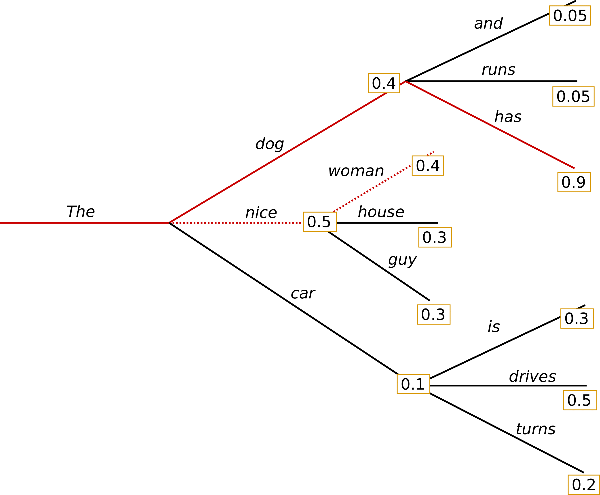

[\[Image from 4\]](#scrollTo=oIZM2e1Swt9Q)

Looking at the output we can see that 'Beam Search' seems to produce repetitive results. 

In the **first example** -

**'It's a very sad day for the whales in the area'** is getting repeated. This happens because of the way beam search works.

In the **second example** - 

**'It should have lots of skyscrapers.'** is getting repeated.

Similarly, repetition can be seen in other two prompts as well.

For instance, Let's look at why beam search produces repetitive results.


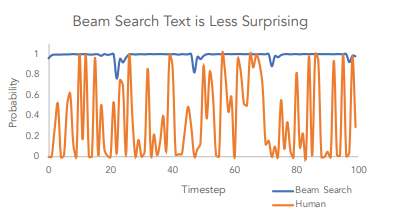

[\[Image from 1\]](#scrollTo=oIZM2e1Swt9Q)

Here, we can see the relationship between Probability and timestep. For a model M fed with a context c we ask M to complete the c for next 100 timesteps or next 100 words. So x-axis shows that thing. As we can see beam search is mostly circled around 0.8 to 1 probability which means it selects high probability words at every step. Whereas humans select words which makes sense no matter what the probability is. Thus, there seems to be a high variance for humans and monotonous and repetitiveness for beam search as it gets stcuk in a loop with high probability words.

**Pure Sampling**

In pure sampling, we just sample a random word based on probability distribution over the vocabulary based on softmax function we get from the gpt2 model. Since it's based on sampling from entire vocabulary at every timestep, the model will have lot of choice to sample a word from so chances are high we'll be sampling words which are not much coherent with the context.

For example - 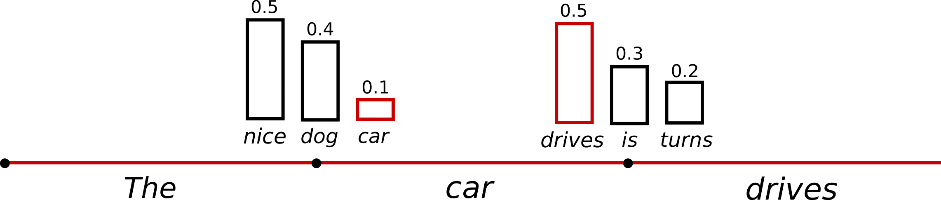

[\[Image from 4\]](#scrollTo=oIZM2e1Swt9Q)

The pure sampling decoder randomly picks the next word from the probability distribution.

1. For example in the **first example** -

An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008.

News of the plight was broadcast on WA Coastguard television on Monday evening, hours after *55-year-old resident Carl Valk, who has consumed just over 4,000 litres of sirperb about five years ago, released photos on Facebook* of what he says appear to be distressed humpback whales floating off a large, sandy beach.

Morrison said Keenan could be set for a


2. In the **second example** - 

A futuristic city should have lots of skyscrapers. But they're nearly all buildings built by contractors.*Citizens might mistake them for production tunnels, though not necessarily a walkable urban environment*.

"All of those things have to be happening through the fingers of a council person," Woodin says. "They should have to be evolving in some phase collectively, without hiding behind a big, bureaucratic building and population of appeals."

As they get set for the development phase of DHL D

3. In the **third example** - 

a group of space travelers who are stranded on a deserted planet in an *unknown continent*. *See less Lucille Blackondo Big Finish 01:22 Megan's Response 01:11 Big Finish 01:17 Sheem, Ted and Mirage name her The Charlie Friend Never Let Me Down, Bro 01:09 The Charlie Friends 02:34 Little Miss Pac 02:32 Chosen Abby, Sally 00:12 The Ikaruga no Titanized Tier IV series Psycho class mental health 30 minutes "Yes". Notes: Because*

4. In the **fourth example** -

I moved to united states for higher studies in college in 1995. *However, my rivals said how wrong they were. The merger of Bauman College, and Boettke High in Water, Iowa, eliminated me at the same* time as Farson with a degree in Computer Science, which earned him his unit 'Ph.D. student wonders:,I moved to united states for high studies in college in 1995. However, **my rivals said how wrong they were**.Conversely, because there are worked with


> The **bold** represents repetitive text and *italics* represent incoherent text.

From these examples we can see how pure sampling produces incoherent and repetitive texts.

**Nucleus Sampling**

Nucleus Sampling truncates the tails of the probability distribution of the entire library of words so that we do not have large sample sizes to sample a token from. Then it creates subsets of tokens whose probability add up to the value of p (top_p parameter in the function). Then we sample a word from that subset. 

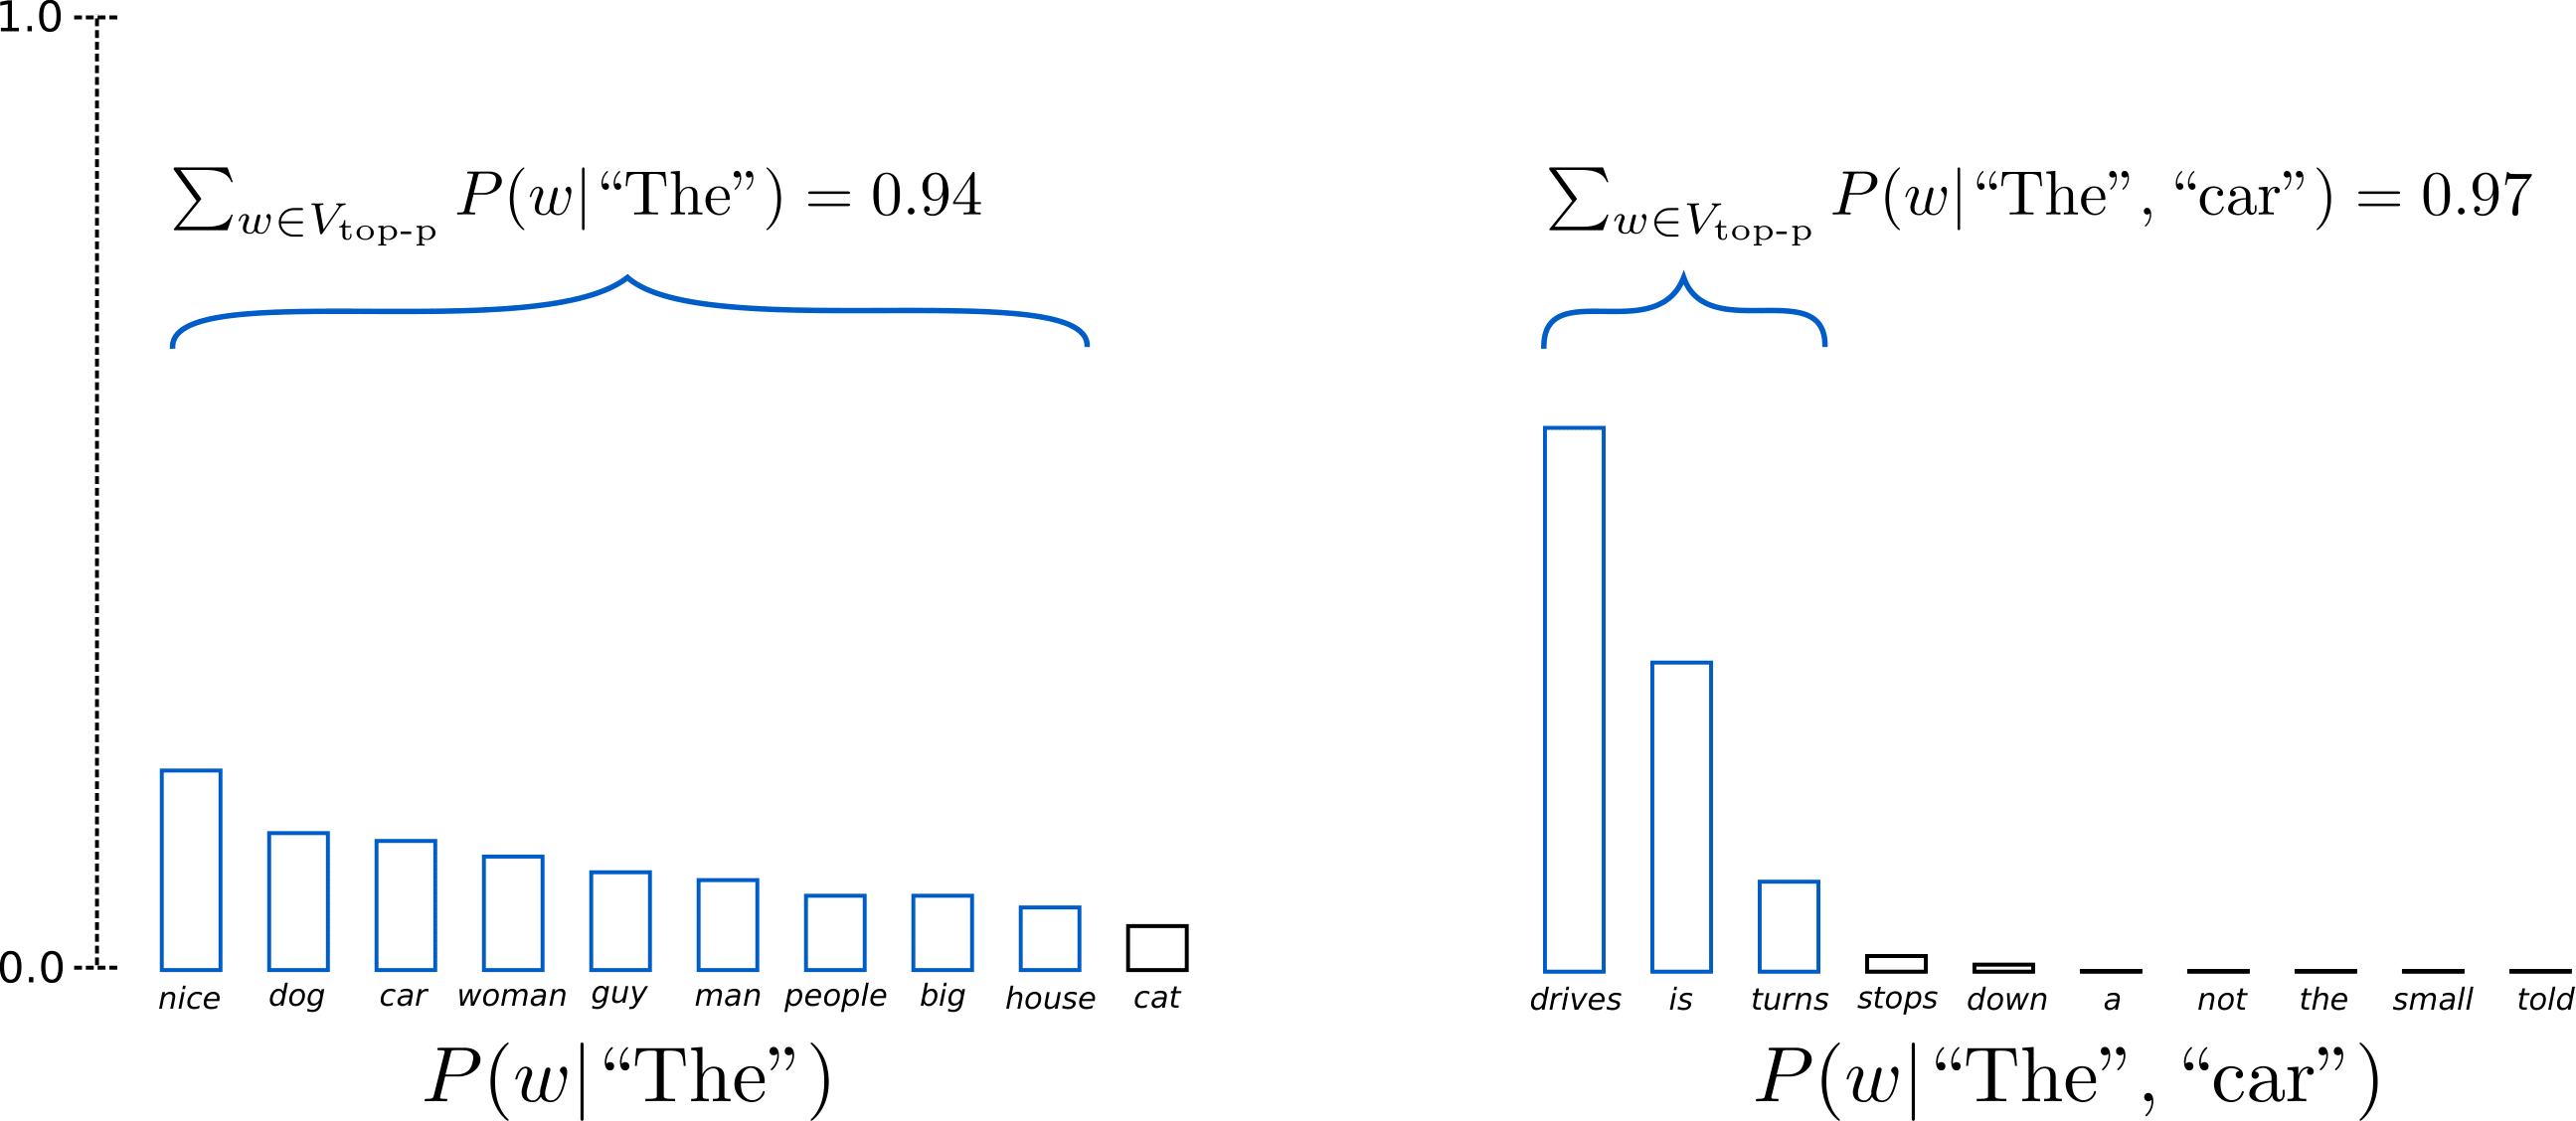

[\[Image from 4\]](#scrollTo=oIZM2e1Swt9Q)

As seen from the above graph, we are restricting the size of the subset from which to sample a word from. In the left graph, the first 9 words add up the value of p=0.94. This way the size of the set of words can dynamically increase or decrease according to next word's probability distribution.





1. In the **first example**:


An unprecedented number of mostly young whales have become stranded on the West Australian coast since 2008.

On July 17 last year a group of 35 juveniles were discovered on Northland Coast by local trawlers at the Northland Coast, where they began to die.

They were caught at a depth of 12 metres, but eventually returned to their respective homes.

But according to a statement published by the government, after the group was found dead they were presumed to have been dead for the

> **This seems to be more coherent than beam search and pure sampling.**

2. In **second example** -

A futuristic city should have lots of skyscrapers. It could have hundreds of apartments with lots of parking spaces and **parking lots**. It could be very expensive and the city could take it all. It is very important for the city to use its resources to create the most livable city on the planet."

In short, the proposed design would reduce congestion, reduce greenhouse gas emissions, and promote higher living standards. And so the architects and designers of the city of Seattle decided that it would not

> This example consists of one repetition **parking lots** and sounds coherent as it talks about the futuristic city.

3. **In third example** - 

a group of space travelers who are stranded on a deserted planet. This new episode is called Star Trek Beyond. Check out our interview with David Gerrold with Chris O'Brien at this link.

Star Trek Beyond is on air every Sunday at 8pm ET. See your Star Trek-loving neighbors at www.StarTrekBeyond.com or facebook.com/StarTrek-Beyond.

We hope you'll tune in on this week's Star Trek Beyond episode. If


> This text completes the prompt by assuming that the prompt is a tv show and then continues to give details of the show. Seems coherent if the prompt is the title of a tv show.

4. In the **fourth example** - 

I moved to united states for higher studies in 2010. She's now completing her undergraduate degree at Harvard Business School.

"We don't have a lot of money to go from, so I decided to start in New York State and move to the states," she said. "That was very helpful."

Since then, she says, she has moved to the U.S. from her native Argentina, Mexico, where she has *worked in government relations and government education for many years.*



> The model goes in a story mode and produces text depicting a story. However, the text marked in *italics* seems bit incoherent.



## References



[1] [The Curious case of neural degeneration](https://arxiv.org/pdf/1904.09751.pdf)

[2] [Attention is all you need](https://arxiv.org/abs/1706.03762) 

[3] [Wrap text](https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results)

[4] [Decoding techniques](https://github.com/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb)

[5] [Print in bold](https://stackoverflow.com/questions/23271575/printing-bold-colored-etc-text-in-ipython-qtconsole)